In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np 
import os
from itertools import chain
from scipy.fft import fft, fftfreq

In [2]:
post_freq_rare_evokeds = []
pre_freq_rare_evokeds = []

post_rare_freq_evokeds = []
pre_rare_freq_evokeds = []

post_freq_freq_evokeds = []
pre_freq_freq_evokeds = []

erp_evokeds = []

folder_path = "C:/Users/leofl/OneDrive/Desktop/ERP Data/Project Cygnus/"  # Replace with your actual folder path

for filename in os.listdir(folder_path):
    if filename.endswith('.set'):  # Check if the file is an EEGLAB .set file
        file_path = os.path.join(folder_path, filename)
        raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)

        ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
        raw_eeg.rename_channels({"FP1":'Fp1','FP2':'Fp2'})
        raw_eeg.set_channel_types({'HEOG_left':'eog', 'HEOG_right':'eog', \
                        'VEOG_lower':'eog', '(uncorr) HEOG' : 'eog',\
                        '(uncorr) VEOG' : 'eog'})
        raw_eeg.set_montage(ten_twenty_montage)
        
        event_p3, event_id_p3 = mne.events_from_annotations(raw_eeg)
        event_p3_minus67 = [array for array in event_p3 if array[2] \
                        != 6 and array[2] != 7]
        
        event_id_p3_epoch = {
        "target": [1, 9, 15, 21, 27], 
        "nontarget": [2, 3, 4, 5, 8, 10, 11, 12, 13,
                    14, 16, 17, 18, 19,
                    20, 22, 23, 24, 25, 
                    26]
        }

        for array in range(len(event_p3_minus67)):
            if event_p3_minus67[array][2] in event_id_p3_epoch['target']:
                event_p3_minus67[array][2] = 100
            elif array > 0 and event_p3_minus67[array][2] in event_id_p3_epoch['nontarget'] and event_p3_minus67[array - 1][2] == 100:
                event_p3_minus67[array][2] = 200
            elif array > 0 and event_p3_minus67[array][2] in event_id_p3_epoch['nontarget'] and event_p3_minus67[array - 1][2] == 200 or event_p3_minus67[array - 1][2] == 300:
                event_p3_minus67[array][2] = 300

        #updating the dictionary to correct pip format
        new_event_id_p3_epoch = {
        "frequent_rare": 100, 
        "rare_frequent": 200, 
        "frequent_frequent": 300  
        }

        #epoching with the appropriate -.6 to .6 epoching window
        epochs = mne.Epochs(raw_eeg, events = event_p3_minus67, 
                        event_id = new_event_id_p3_epoch,
                        tmin  = -.6, tmax = .6,
                        picks = ['Pz'],
                        baseline = None,
                        preload=True) 
        
        #seperating into pre and post epoch sections for analysis
        epochs_pre_stimulus_window = epochs.copy().crop(tmin=-.6, tmax=0)
        epochs_post_stimulus_window = epochs.copy().crop(tmin=0, tmax= .6)
        
        #computing pip averages as well as erp
        post_freq_rare = epochs_post_stimulus_window['frequent_rare'].average() 
        pre_freq_rare = epochs_pre_stimulus_window['frequent_rare'].average() 

        post_rare_freq = epochs_post_stimulus_window['rare_frequent'].average()
        pre_rare_freq = epochs_pre_stimulus_window['rare_frequent'].average()

        post_freq_freq = epochs_post_stimulus_window['frequent_frequent'].average()
        pre_freq_freq = epochs_pre_stimulus_window['frequent_frequent'].average()

        erp = epochs.average() 

        
        post_freq_rare_evokeds.append(post_freq_rare)
        pre_freq_rare_evokeds.append(pre_rare_freq)

        post_rare_freq_evokeds.append(post_rare_freq)
        pre_rare_freq_evokeds.append(pre_rare_freq) 
        
        post_freq_freq_evokeds.append(post_freq_freq)
        pre_freq_freq_evokeds.append(pre_freq_freq)

        erp_evokeds.append(erp)

post_freq_rare_grand_ave = mne.grand_average(post_freq_rare_evokeds)
pre_freq_rare_grand_ave = mne.grand_average(pre_freq_rare_evokeds)

post_rare_freq_grand_ave = mne.grand_average(post_rare_freq_evokeds)
pre_rare_freq_grand_ave = mne.grand_average(pre_rare_freq_evokeds)

post_freq_freq_grand_ave = mne.grand_average(post_freq_freq_evokeds)
pre_freq_freq_grand_ave = mne.grand_average(pre_freq_freq_evokeds)

erp_grand_ave = mne.grand_average(erp_evokeds)


Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_1.fdt


C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (1_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_1.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)


Reading 0 ... 119551  =      0.000 ...   466.996 secs...
Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_10.fdt
Reading 0 ... 93951  =      0.000 ...   366.996 secs...
Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
194 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 194 events and 309 original time points ...


C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (10_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_10.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)


0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_11.fdt
Reading 0 ... 94207  =      0.000 ...   367.996 secs...
Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
192 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 192 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_12.fdt
Reading 0 ... 86271  =      0.000 ...   336.996 secs...
Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']


C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (11_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_11.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (12_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_12.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
189 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 189 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_13.fdt
Reading 0 ... 96511  =      0.000 ...   376.996 secs...
Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
193 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 193 events and 309 original time points ...
0 bad epochs dropped


C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (13_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_13.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)


Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_14.fdt
Reading 0 ... 86783  =      0.000 ...   338.996 secs...
Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 309 original time points ...
0 bad epochs dropped


C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (14_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_14.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)


Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_15.fdt
Reading 0 ... 93183  =      0.000 ...   363.996 secs...
Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
199 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 199 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_16.fdt
Reading 0 ... 106239  =      0.000 ...   414.996 secs...


C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (15_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_15.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (16_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_16.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)


Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_17.fdt
Reading 0 ... 100351  =      0.000 ...   391.996 secs...
Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
193 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 193 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p

C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (17_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_17.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (18_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_18.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)


Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
196 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 196 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_19.fdt
Reading 0 ... 94207  =      0.000 ...   367.996 secs...
Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3

C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (19_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_19.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (2_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_2.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)


Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
196 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 196 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_20.fdt
Reading 0 ... 94207  =      0.000 ...   367.996 secs...
Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
190 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 190 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3

C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (20_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_20.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (3_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_3.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)


Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
178 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 178 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_4.fdt
Reading 0 ... 139263  =      0.000 ...   543.996 secs...
Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
198 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 198 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3

C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (4_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_4.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (5_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_5.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)


Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
192 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 192 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_6.fdt
Reading 0 ... 83967  =      0.000 ...   327.996 secs...
Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
190 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 190 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_

C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (6_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_6.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (7_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_7.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)


Not setting metadata
197 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 197 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_8.fdt
Reading 0 ... 117759  =      0.000 ...   459.996 secs...
Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 200 events and 309 original time points ...
0 bad epochs dropped
Reading C:\Users\leofl\OneDrive\Desktop\ERP Data\Project Cygnus\p3_9.fdt
Reading 0 ... 90367  =      0.000 ...   352.996 secs...


C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (8_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_8.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)
C:\Users\leofl\AppData\Local\Temp\ipykernel_21420\1085779725.py:17: RuntimeWarning: Data file name in EEG.data (9_P3_shifted_ds_reref_ucbip_hpfilt_ica_weighted.fdt) is incorrect, the file name must have changed on disk, using the correct file name (p3_9.fdt).
  raw_eeg = mne.io.read_raw_eeglab(file_path, preload=True)


Used Annotations descriptions: ['11', '12', '13', '14', '15', '201', '202', '21', '22', '23', '24', '25', '31', '32', '33', '34', '35', '41', '42', '43', '44', '45', '51', '52', '53', '54', '55']
Not setting metadata
185 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 185 events and 309 original time points ...
0 bad epochs dropped
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...


In [13]:
erp_evokeds

[<Evoked | '0.20 × frequent_rare + 0.17 × rare_frequent + 0.64 × frequent_frequent' (average, N=200), -0.60156 – 0.60156 s, baseline off, 1 ch, ~20 kB>,
 <Evoked | '0.21 × frequent_rare + 0.17 × rare_frequent + 0.62 × frequent_frequent' (average, N=194), -0.60156 – 0.60156 s, baseline off, 1 ch, ~20 kB>,
 <Evoked | '0.21 × frequent_rare + 0.17 × rare_frequent + 0.62 × frequent_frequent' (average, N=192), -0.60156 – 0.60156 s, baseline off, 1 ch, ~20 kB>,
 <Evoked | '0.21 × frequent_rare + 0.16 × rare_frequent + 0.62 × frequent_frequent' (average, N=189), -0.60156 – 0.60156 s, baseline off, 1 ch, ~20 kB>,
 <Evoked | '0.21 × frequent_rare + 0.16 × rare_frequent + 0.64 × frequent_frequent' (average, N=193), -0.60156 – 0.60156 s, baseline off, 1 ch, ~20 kB>,
 <Evoked | '0.20 × frequent_rare + 0.18 × rare_frequent + 0.62 × frequent_frequent' (average, N=200), -0.60156 – 0.60156 s, baseline off, 1 ch, ~20 kB>,
 <Evoked | '0.20 × frequent_rare + 0.18 × rare_frequent + 0.62 × frequent_frequent

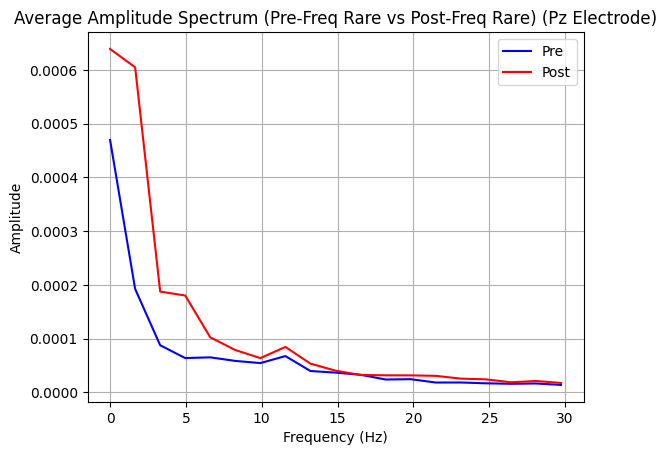

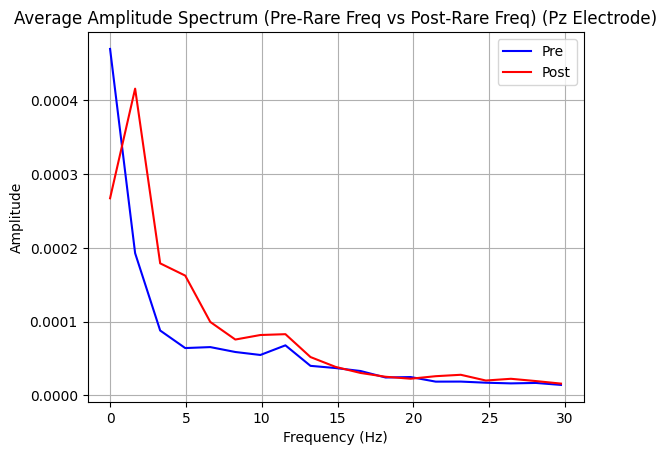

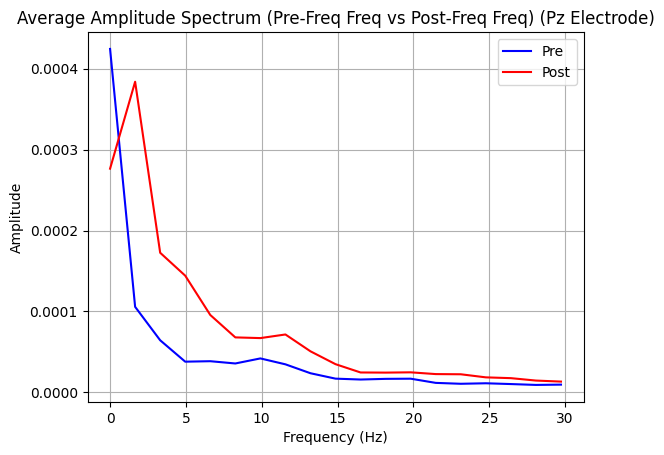

In [ ]:
# Combine all the lists of Evoked objects into one iterable with labels
all_evoked_lists = {
    "Post-Freq Rare": post_freq_rare_evokeds,
    "Pre-Freq Rare": pre_freq_rare_evokeds,
    "Post-Rare Freq": post_rare_freq_evokeds,
    "Pre-Rare Freq": pre_rare_freq_evokeds,
    "Post-Freq Freq": post_freq_freq_evokeds,
    "Pre-Freq Freq": pre_freq_freq_evokeds,
    "ERP": erp_evokeds
}

fft_database = []

# Loop through each list of Evoked objects
for evoked_type, evoked_list in all_evoked_lists.items():
    # Reset variables for each list of Evoked objects
    xfs = []
    yfs = [] 

    # Loop through individual Evoked objects in the current list
    for evoked in evoked_list:
        # Pick the Pz channel
        evoked_pz = evoked.copy().pick(['Pz'])
        sample_rate = evoked.info['sfreq']  # Sampling frequency
        
        # Extract data for Pz
        post_data = evoked_pz.get_data()  # Shape: (n_channels, n_times)
        post_data_pz = post_data[0, :]  # Extract the 1D array for Pz (n_times)

        # Perform FFT
        N = len(post_data_pz)
        yf = fft(post_data_pz)
        yf_avg = np.abs(yf)  # Compute magnitude spectrum

        # Store results
        yfs.append(yf_avg)
        xf = fftfreq(N, 1 / sample_rate)  # Frequency axis
        xfs.append(xf)
    
    # Append after processing all Evoked objects in the current list
    fft_database.append([evoked_type, xfs, yfs])

# Now, we can loop over fft_database to plot pre and post conditions
for i in range(len(fft_database)):
    if 'Pre' in fft_database[i][0]:
        # Find matching Post condition
        pre_type = fft_database[i][0]
        post_type = pre_type.replace('Pre', 'Post')
        # Find the index of post_type in fft_database
        post_index = None
        for j in range(len(fft_database)):
            if fft_database[j][0] == post_type:
                post_index = j
                break
        if post_index is not None:
            # Compute the average across participants for pre and post
            yfs_pre = np.array(fft_database[i][2])  # yfs for pre condition
            yfs_post = np.array(fft_database[post_index][2])  # yfs for post condition

            yf_pre_mean = np.mean(yfs_pre, axis=0)  # Average over participants
            yf_post_mean = np.mean(yfs_post, axis=0)

            # Frequency mask (e.g., limit to 30 Hz)
            xf_pre = fft_database[i][1][0]  # xfs for pre condition, take first participant
            N = len(xf_pre)
            mask = xf_pre[:N // 2] <= 30

            # Plot
            fig, ax = plt.subplots()
            plt.plot(xf_pre[:N // 2][mask], yf_pre_mean[:N // 2][mask], color='blue', label='Pre')
            plt.plot(xf_pre[:N // 2][mask], yf_post_mean[:N // 2][mask], color='red', label='Post')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Amplitude')
            plt.title(f'Average Amplitude Spectrum ({pre_type} vs {post_type}) (Pz Electrode)')
            plt.legend()
            plt.grid(True)
            plt.show()
           